In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint,EarlyStopping

import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
X_test.dtype

dtype('uint8')

In [6]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255 #2D이미지가 그대로 들어가도 됨(28,28), 마지막 1은 RGB값.
#이 이미지의 경우 RGB 값이 없기 때문에 1이 들어간다. 만약 RGB값이 있으면 마지막 숫자가 3이 된다. 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

In [7]:
X_train.shape

(60000, 28, 28, 1)

In [8]:
X_train.dtype

dtype('float32')

In [9]:
# 컨볼루션 신경망의 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu')) 
#커널은 한변의 길이가 3인 정사각형이다.
#이때, 노드의 개수는 32개이다. 
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))  #과적합을 막기 위해 Dropout
model.add(Flatten()) #2D를 평면으로 바꿔주기 위해 Flatten() 사용
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [10]:
# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])


Epoch 00001: val_loss improved from inf to 0.05709, saving model to ./model/01-0.0571.hdf5

Epoch 00002: val_loss improved from 0.05709 to 0.04504, saving model to ./model/02-0.0450.hdf5

Epoch 00003: val_loss improved from 0.04504 to 0.03221, saving model to ./model/03-0.0322.hdf5

Epoch 00004: val_loss improved from 0.03221 to 0.03041, saving model to ./model/04-0.0304.hdf5

Epoch 00005: val_loss did not improve from 0.03041

Epoch 00006: val_loss improved from 0.03041 to 0.02861, saving model to ./model/06-0.0286.hdf5

Epoch 00007: val_loss improved from 0.02861 to 0.02653, saving model to ./model/07-0.0265.hdf5

Epoch 00008: val_loss improved from 0.02653 to 0.02645, saving model to ./model/08-0.0264.hdf5

Epoch 00009: val_loss did not improve from 0.02645

Epoch 00010: val_loss did not improve from 0.02645

Epoch 00011: val_loss did not improve from 0.02645

Epoch 00012: val_loss did not improve from 0.02645

Epoch 00013: val_loss did not improve from 0.02645

Epoch 00014: val_lo

In [12]:
model.evaluate(X_test, Y_test)[1]

313/313 [==============================] - 2s 8ms/step - loss: 0.0320 - accuracy: 0.9920


0.9919999837875366

In [13]:
# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

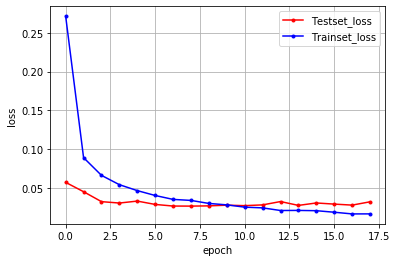

In [14]:
# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()